In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# 拉丁超立方采样步骤（采样N个样本点）
## 1.将每个维度分成N个区间,使得每个区间有相同概率
## 2.在每个维度的每一个区间中随机地抽取一个点（本次按均匀分布抽取）
## 3.从每一维中里随机抽出2.中选取的点，将它们组成向量

In [46]:
def lHSample(D,bound,N):
    '''
    @param
    D:维度数
    bound：每个维度的取值范围,shape为[D,2]
    N：待采样点个数     
    '''
    result = np.empty([N,D])
    tmp = np.empty([N])
    d  = 1 / N # 用来平分每个区间
    
    # 仅在【0，1】区间内进行采样，随后根据bound拉伸数据
    for i in range(D):
        for j in range(N):
            tmp[j] = np.random.uniform(low=j*d,high=(j+1)*d)
        np.random.shuffle(tmp)
        result[:,i] = tmp
#     print(result)
    lower_bounds = bound[:,0]
    upper_bounds = bound[:,1]
    result = result*(upper_bounds-lower_bounds)+lower_bounds
    return result

In [47]:
bounds = np.array([[1,20],[4,30]])
lHSample(2,bounds,20)

array([[ 9.94602341, 22.10282114],
       [14.3683644 ,  7.80896036],
       [ 3.92530067,  4.68838208],
       [ 8.56729346, 10.27809591],
       [ 6.99822372, 24.67341567],
       [10.88047132, 13.12271654],
       [17.57290268, 16.92842814],
       [12.69622782, 12.31073809],
       [16.91327716, 17.1879733 ],
       [15.76557497, 14.75921896],
       [ 2.55996015, 27.08651111],
       [ 5.49432818, 27.48582272],
       [ 1.84028319, 19.10566472],
       [ 6.55951962,  6.47628351],
       [ 3.0492879 , 29.13803597],
       [13.61231848, 20.21374385],
       [19.66231817, 22.98430433],
       [ 9.08023856,  7.93818353],
       [18.31518527, 25.28097212],
       [11.47713527, 11.17267077]])

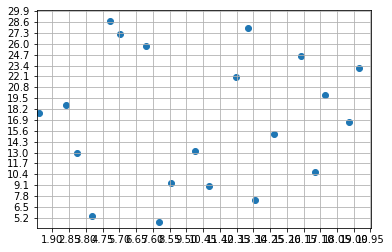

In [48]:
ax = plt.gca()
plt.xlim(bounds[0,0],bounds[0,1])
plt.ylim(bounds[1,0],bounds[1,1])
plt.grid()
ax.xaxis.set_major_locator(MultipleLocator((bounds[0][1] - bounds[0][0])/20))
ax.yaxis.set_major_locator(MultipleLocator((bounds[1][1] - bounds[1][0])/20))
result = lHSample(2,bounds,20)
plt.scatter(result[:,0],result[:,1])